<a href="https://colab.research.google.com/github/saraa16/forest-cover-prediction/blob/main/CoverType_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Forest Cover Type Classification**


we have a cover_data.csv file that contains different features and forest cover type. we will use this data to teach our model to predict the cover type: 

1.   Spruce/Fir
2.   Lodgepole Pine
3.   Ponderosa Pine
4.   Cottonwood/Willow
5.   Aspen
6.   Douglas-fir
7.   Krummholz

In [ ]:
#!pip install tensorflow-gpu

In [ ]:
import pandas as pd
from google.colab import files
#file = files.upload()

In [ ]:
import tensorflow  as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import InputLayer
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Explore data

In [ ]:
from google.colab.data_table import DataTable
#increase max columns displayed
DataTable.max_columns = 60
df = pd.read_csv('cover_data.csv') 
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [ ]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,class
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


count    581012.000000
mean          2.051471
std           1.396504
min           1.000000
25%           1.000000
50%           2.000000
75%           2.000000
max           7.000000
Name: class, dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


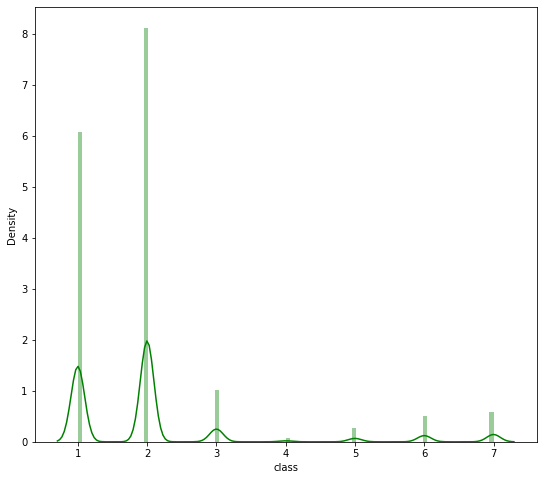

In [ ]:
print(df['class'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['class'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [ ]:
def design_model(data):
  model = Sequential(name ="forest_cover")
  input = InputLayer(input_shape=(data.shape[1],))
  print('NUMBER OF FEATURES!!!!:',data.shape[1])
  #add input layer
  model.add(input)
  #add hidden layers
  model.add(Dense(128, activation='relu'))
  model.add(Dense(32, activation='relu'))
  #add output layer
  model.add(Dense(8, activation ='softmax'))
  #compile
  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  print('model summary:')
  model.summary()
  return model

In [ ]:
def plot_heatmap(class_names, y_pred, y_test):
    """
    Function to compute a Confusion Matrix and plot a heatmap based on the matrix.
    input: class names, y-predicted, y-test (ground-truth)
    output: a PNG file of the heatmap.
    """
    cm = confusion_matrix(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(15, 15))
    heatmap = sns.heatmap(cm, fmt='g', cmap='Blues', annot=True, ax=ax)
    ax.set_xlabel('Predicted class')
    ax.set_ylabel('True class')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(class_names)
    ax.yaxis.set_ticklabels(class_names)
    # Save the heatmap to file
    heatmapfig = heatmap.get_figure()
    heatmapfig.savefig(f'../content/confusion_matrix.png')

In [ ]:
def plot_history(history, param):
    """
    Shows how the model performs (in terms of accuracy and loss) over several epochs.
    """
    if param == 'acc':
        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title('model accuracy')
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper left')
        plt.show()
    elif param == 'loss':
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title('model loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'val'], loc='upper right')
        plt.show()

Data Preprocessing

In [ ]:
#split data into features and labels
labels = df.iloc[:, -1]
features = df.iloc[:, :-1]
labels.value_counts()


2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: class, dtype: int64

In [ ]:
#split data into training set and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.20, 
                                                                            random_state=42)
#Normalize data
scaler = StandardScaler()
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)

Let's run our model

In [ ]:
#build model
model = design_model(features_train)


NUMBER OF FEATURES!!!!: 54
model summary:
Model: "forest_cover"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               7040      
                                                                 
 dense_31 (Dense)            (None, 32)                4128      
                                                                 
 dense_32 (Dense)            (None, 8)                 264       
                                                                 
Total params: 11,432
Trainable params: 11,432
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fit model 
es = EarlyStopping(monitor='val_accuracy', mode='min', verbose=1, patience=30)
history= model.fit(features_train, labels_train, epochs=45, batch_size=1024, verbose=1, validation_split = 0.1, callbacks = [es])


Epoch 1/45
409/409 [==============================] - 3s 7ms/step - loss: 0.7202 - accuracy: 0.7142 - val_loss: 0.5810 - val_accuracy: 0.7546
Epoch 2/45
409/409 [==============================] - 2s 4ms/step - loss: 0.5472 - accuracy: 0.7661 - val_loss: 0.5246 - val_accuracy: 0.7751
Epoch 3/45
409/409 [==============================] - 2s 4ms/step - loss: 0.5027 - accuracy: 0.7851 - val_loss: 0.4849 - val_accuracy: 0.7928
Epoch 4/45
409/409 [==============================] - 2s 4ms/step - loss: 0.4738 - accuracy: 0.7980 - val_loss: 0.4708 - val_accuracy: 0.7968
Epoch 5/45
409/409 [==============================] - 2s 4ms/step - loss: 0.4534 - accuracy: 0.8072 - val_loss: 0.4450 - val_accuracy: 0.8101
Epoch 6/45
409/409 [==============================] - 2s 4ms/step - loss: 0.4374 - accuracy: 0.8153 - val_loss: 0.4334 - val_accuracy: 0.8180
Epoch 7/45
409/409 [==============================] - 2s 4ms/step - loss: 0.4244 - accuracy: 0.8206 - val_loss: 0.4216 - val_accuracy: 0.8233
Epoch 

Let's evaluate our model

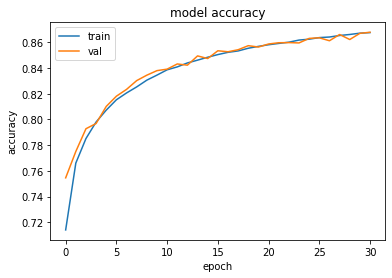

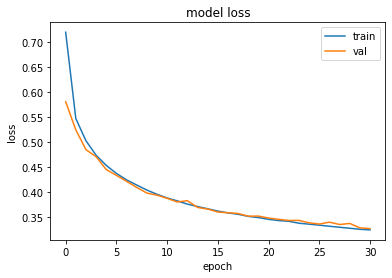

3632/3632 [==============================] - 11s 3ms/step - loss: 0.3296 - accuracy: 0.8660
Test loss: 0.3295932412147522
Test accuracy: 0.8660103678703308


In [ ]:
plot_history(history, 'acc')
plot_history(history, 'loss')
score = model.evaluate(features_test, labels_test, verbose=1)
print(f'Test loss: {score[0]}')
print(f'Test accuracy: {score[1]}')

Let's make predictions

                   precision    recall  f1-score   support

       Spruce/Fir       0.87      0.86      0.86     42557
   Lodgepole Pine       0.87      0.90      0.89     56500
   Ponderosa Pine       0.84      0.86      0.85      7121
Cottonwood/Willow       0.82      0.67      0.74       526
            Aspen       0.81      0.47      0.60      1995
      Douglas-fir       0.70      0.66      0.68      3489
        Krummholz       0.89      0.87      0.88      4015

         accuracy                           0.87    116203
        macro avg       0.83      0.76      0.79    116203
     weighted avg       0.87      0.87      0.86    116203



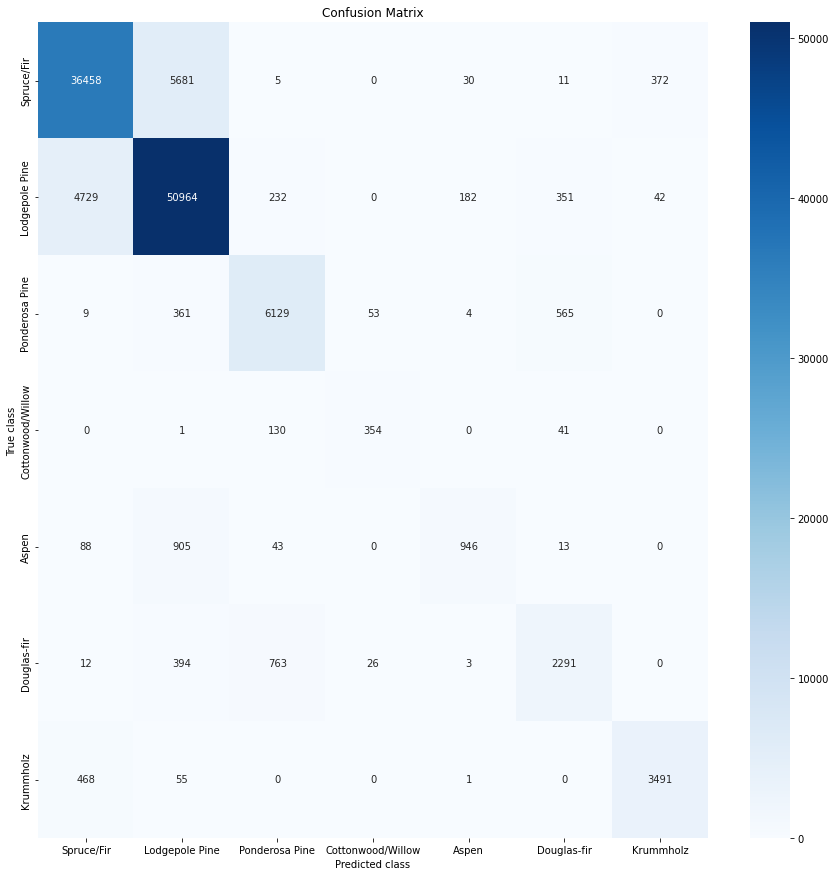

In [ ]:
labels_pred = model.predict(features_test)

# Convert the pred to discrete values
labels_pred = np.argmax(labels_pred, axis=1)
class_names = ['Spruce/Fir', 'Lodgepole Pine',
                   'Ponderosa Pine', 'Cottonwood/Willow',
                   'Aspen', 'Douglas-fir', 'Krummholz']
print(classification_report(labels_test, labels_pred, target_names=class_names))
plot_heatmap(class_names, labels_pred, labels_test)

**Conclusion**

The purpose of this project is to put my new Deep Learning skills to practice.
As the main focus is to build a model, the plotting part was taken from codecademy solution.
Percision and accuracy seem to be satisfactory.
The model can be tuned to provide different results.